### We plot tSNE and PCA with children and adults in different colours.
Red is original-adult, yellow is original-children, blue is generated-adult, green is generated-children

In [1]:
import pandas as pd
import numpy as np
dp_ori_df = pd.read_csv('synthetic data/doppelGANger/dp_ori.csv') #dataframe of shape(1347*130, 5), originally ori_features_prism.npy
dp_gen_df = pd.read_csv('synthetic data/doppelGANger/dp_gen.csv') #dataframe of shape(1347*130, 5), originally features_600.npy

In [4]:
def CutTimeSequence(a,time_sequence): 
    '''A function which transforms temporal-sequence-flattened dataframe or array (e.g. the loaded dataframes) to array in shape (no_sample, time_seq, dimension)
    
    Args:
    a: the dataframe or array in shape (no_sample * time_seq, dimension)
    time_sequence: the time_seq argument in the shape of the returned array
    
    Returns:
    new_a : array in new shape (no_sample, time_seq, dimension)
    
    '''
    import pandas as pd
    import numpy as np
    
    if type(a)==pd.core.frame.DataFrame:
        a = a.values
    l,d = a.shape
    new_a = np.zeros((int(l/time_sequence),time_sequence,d))
    for i in range(l):
        new_a[int(i/time_sequence),i%time_sequence,:]=a[i,:]
    return new_a

In [5]:
dp_ori_data = CutTimeSequence(dp_ori_df,130) #shape (1347,130,5)
dp_gen_data = CutTimeSequence(dp_gen_df,130) #shape (1347,130,5)

In [6]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
ori_data = dp_ori_data
generated_data = dp_gen_data
anal_sample_no = min([1000, len(ori_data),len(generated_data)])
idx = np.random.permutation(len(ori_data))[:anal_sample_no]
ori_children_bool = ori_data[:,0,3]<18
gen_children_bool = generated_data[:,0,3]<18
ori_data = ori_data[idx]
generated_data = generated_data[idx]
ori_children_bool = ori_children_bool[idx]
gen_children_bool = gen_children_bool[idx]
seq_len =130
red_ = ['red']*anal_sample_no
for i in range(anal_sample_no):
    if ori_children_bool[i]:
        red_[i] = 'yellow'

blue_ = ['blue']*anal_sample_no
for i in range(anal_sample_no):
    if gen_children_bool[i]:
        blue_[i] = 'green'

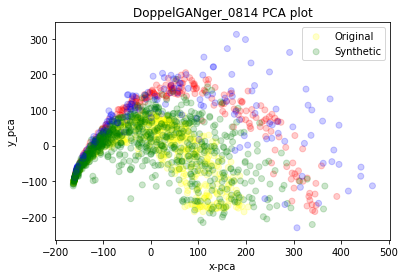

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.010s...
[t-SNE] Computed neighbors for 2000 samples in 0.879s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 21.139197
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.509689
[t-SNE] KL divergence after 300 iterations: 0.767824


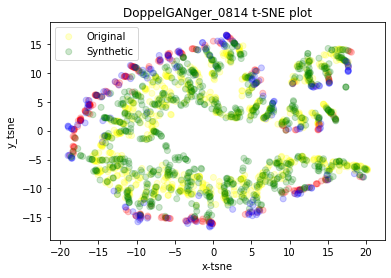

In [7]:
syn_name = 'DoppelGANger_0814'
for i in range(anal_sample_no):
    if (i == 0):
      prep_data = np.reshape(np.mean(ori_data[0,:,:], 1), [1,seq_len])
      prep_data_hat = np.reshape(np.mean(generated_data[0,:,:],1), [1,seq_len])
    else:
      prep_data = np.concatenate((prep_data, 
                                  np.reshape(np.mean(ori_data[i,:,:],1), [1,seq_len])))
      prep_data_hat = np.concatenate((prep_data_hat, 
                                      np.reshape(np.mean(generated_data[i,:,:],1), [1,seq_len])))

# Visualization parameter        
colors = red_ + blue_   

# PCA Analysis
pca = PCA(n_components = 2)
pca.fit(prep_data)
pca_results = pca.transform(prep_data) #PCA coordinates for the real data
pca_hat_results = pca.transform(prep_data_hat) #PCA coordinates for the synthetic data

# Plotting
f, ax = plt.subplots(1)    
plt.scatter(pca_results[:,0], pca_results[:,1],
            c = colors[:anal_sample_no], alpha = 0.2, label = "Original")
plt.scatter(pca_hat_results[:,0], pca_hat_results[:,1], 
            c = colors[anal_sample_no:], alpha = 0.2, label = "Synthetic")

ax.legend()  
plt.title(syn_name+' '+'PCA plot')
plt.xlabel('x-pca')
plt.ylabel('y_pca')
#plt.savefig('png_files/2.1 tsne/'+syn_name+'_pca'+'.png')
plt.show()

# Do t-SNE Analysis together       
prep_data_final = np.concatenate((prep_data, prep_data_hat), axis = 0)

# TSNE anlaysis
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_results = tsne.fit_transform(prep_data_final) #tSNE coordinates, 
#for [:anal_sample_no, : ] are the coordinates for the original,
#for [anal_sample_no: , : ] are the coordinates for the generated

# Plotting
f, ax = plt.subplots(1)

plt.scatter(tsne_results[:anal_sample_no,0], tsne_results[:anal_sample_no,1], 
            c = colors[:anal_sample_no], alpha = 0.2, label = "Original")
plt.scatter(tsne_results[anal_sample_no:,0], tsne_results[anal_sample_no:,1], 
            c = colors[anal_sample_no:], alpha = 0.2, label = "Synthetic")

ax.legend()

plt.title(syn_name+' '+'t-SNE plot')
plt.xlabel('x-tsne')
plt.ylabel('y_tsne')
#plt.savefig('png_files/2.1 tsne/'+syn_name+'_tsne'+'.png')
plt.show()    

We can see that the gap in the PCA plots is due to the year gap.